In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Customer Churn Prediction in Iranian Telecom 

## Problem Statement

Iranian telecom company is trying to predict the customer churn and looking for a solutions to reduce the rate of customer churn.  Churn has categorized with two classes (1: churn, 0: non-churn). 

If we can predict which customers are highly likely to churn, we can reach out to the customers and discuss any concerns that they might have. Or we can target them for the promotional campaign. 

This telecom campany has random 3150 samples. 

## Load, Explore, Clean Data

In [2]:
# Load the data and show the first rows 
df = pd.read_csv('Customer Churn.csv') 
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
#Check all columns in the original dataset
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [4]:
#Fill the blank spaces between words
df.columns = [s.strip().upper().replace(' ', '_') for s in df.columns] 
df.columns

Index(['CALL__FAILURE', 'COMPLAINS', 'SUBSCRIPTION__LENGTH', 'CHARGE__AMOUNT',
       'SECONDS_OF_USE', 'FREQUENCY_OF_USE', 'FREQUENCY_OF_SMS',
       'DISTINCT_CALLED_NUMBERS', 'AGE_GROUP', 'TARIFF_PLAN', 'STATUS', 'AGE',
       'CUSTOMER_VALUE', 'CHURN'],
      dtype='object')

In [5]:
#Rename some columns as these colums have two underscores 
df.rename(columns={'CALL__FAILURE': 'CALL_FAILURE'}, inplace=True)
df.rename(columns={'SUBSCRIPTION__LENGTH': 'SUBSCRIPTION_LENGTH'}, inplace=True)
df.rename(columns={'CHARGE__AMOUNT': 'CHARGE_AMOUNT'}, inplace=True)

In [6]:
#Check all columns after making it consistent and clean
df.columns

Index(['CALL_FAILURE', 'COMPLAINS', 'SUBSCRIPTION_LENGTH', 'CHARGE_AMOUNT',
       'SECONDS_OF_USE', 'FREQUENCY_OF_USE', 'FREQUENCY_OF_SMS',
       'DISTINCT_CALLED_NUMBERS', 'AGE_GROUP', 'TARIFF_PLAN', 'STATUS', 'AGE',
       'CUSTOMER_VALUE', 'CHURN'],
      dtype='object')

In [7]:
# Checking for missing values and there is no null value in this dataset
df.isnull().sum()

CALL_FAILURE               0
COMPLAINS                  0
SUBSCRIPTION_LENGTH        0
CHARGE_AMOUNT              0
SECONDS_OF_USE             0
FREQUENCY_OF_USE           0
FREQUENCY_OF_SMS           0
DISTINCT_CALLED_NUMBERS    0
AGE_GROUP                  0
TARIFF_PLAN                0
STATUS                     0
AGE                        0
CUSTOMER_VALUE             0
CHURN                      0
dtype: int64

In [8]:
#Checking the types for all variables
df.dtypes

CALL_FAILURE                 int64
COMPLAINS                    int64
SUBSCRIPTION_LENGTH          int64
CHARGE_AMOUNT                int64
SECONDS_OF_USE               int64
FREQUENCY_OF_USE             int64
FREQUENCY_OF_SMS             int64
DISTINCT_CALLED_NUMBERS      int64
AGE_GROUP                    int64
TARIFF_PLAN                  int64
STATUS                       int64
AGE                          int64
CUSTOMER_VALUE             float64
CHURN                        int64
dtype: object

## Check Highly Correlated Variables

In [9]:
#Checking to see whether two variables are highly correlated 
correlation_matrix = df.corr()

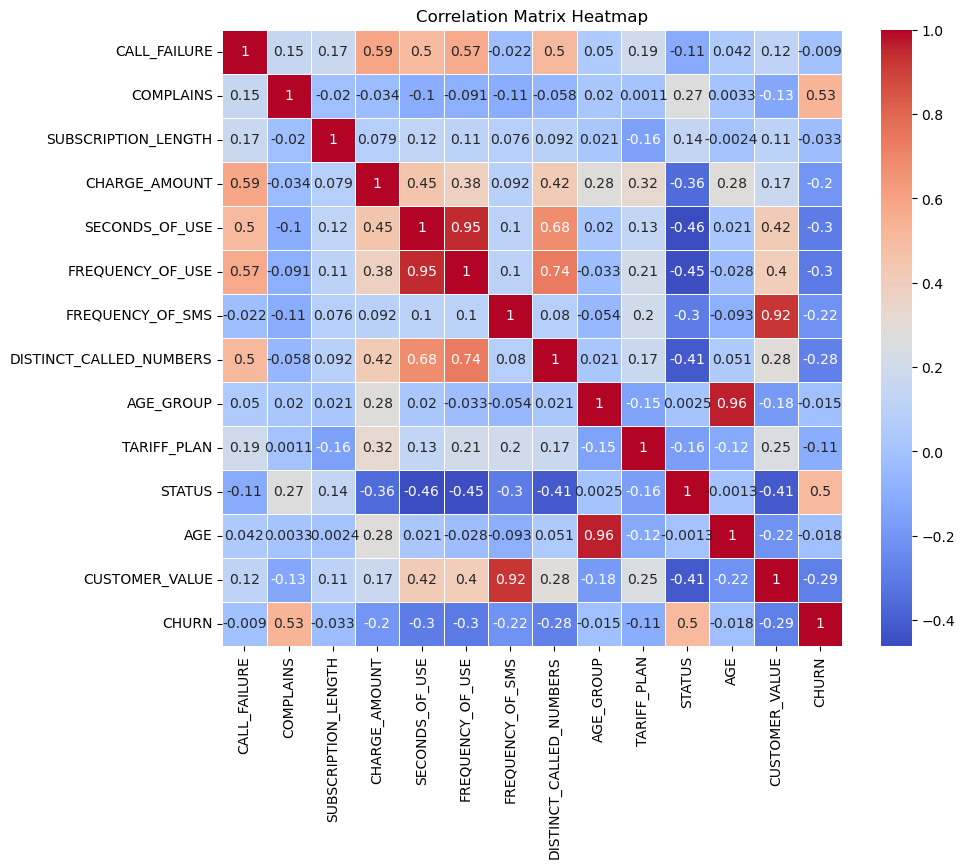

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

・Frequency of use & seconds of use  : 0.95   
・Frequency of SMS & Customer value  :0.92  
・Age & age group  : 0.96  

In [11]:
#Drop seconds of use and age group as this highly correlated variables might affect the R squared value. 
df = df.drop(columns= ["SECONDS_OF_USE","AGE_GROUP"])

In [12]:
#Show the all columns for the analysis
df.columns

Index(['CALL_FAILURE', 'COMPLAINS', 'SUBSCRIPTION_LENGTH', 'CHARGE_AMOUNT',
       'FREQUENCY_OF_USE', 'FREQUENCY_OF_SMS', 'DISTINCT_CALLED_NUMBERS',
       'TARIFF_PLAN', 'STATUS', 'AGE', 'CUSTOMER_VALUE', 'CHURN'],
      dtype='object')

In [13]:
#Export the data to CSV and ready to be used for addressing data imbalance and model fitting 
df.to_csv('Customer_Churn_Pre.csv', index=False)